# K-ICT 빅데이터센터 _와인 품질 예측
[K-ICT 빅데이터 센터 : 파면 팔수록 쉽고 재미있는 머신러닝](https://www.youtube.com/playlist?list=PLwvr-xPygMX9TaQFW3C1UGEuD0zJF7pCk)


- 7강 01 ~ 04강의

# 와인 품질
1. 단순 선형 회귀
2. 다중 선형 회귀
3. 다항 회귀
---
- 레드와인 : 1,599건
- 화이트 와인 : 4,898건
---
- 입력변수 : 12개
- 출력변수 : 1개 (와인 품질 평가 점수, 1점 ~ 10점)
---


- 데이터 출처 : https://archive.ics.uci.edu/ml/datasets/Wine+Quality
    - 데이터 : https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

# 와인 품질 데이터 탐색

- [참고 유튜브 : K-ICT 빅데이터 센터_ 파이썬 머신러닝 강의 07-1 와인품질 데이터 탐색](https://youtu.be/4IzZ_3QGuG4?feature=shared)


## 라이브러리 및 데이터

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings  # warnings 모듈 import

# 경고 메시지 숨기기
warnings.filterwarnings("ignore")

컬럼 설명(입력변수)

- 산도 : fixed acidity
- 휘발성산 : volatile acidity
- 시트르산 : citric acid
- 잔당 : 발효 후 와인 속에 남아있는 당분 : residual sugar
- 염화물 : chlorides
- 독립 이산화황 : free sulfur dioxide
- 총 이산화황 : total sulfur dioxide
- density : 밀도
- pH : 수소 이온 농도
- sulphates : 황산염
- alcohol : 도
- quality : 품질


In [ ]:
# 데이터 불러오기
# 레드와인
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',
            sep=";", header = 0)
red_wine['type'] = 'red'
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


In [ ]:
# 화이트 와인
wh_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',
            sep=";", header = 0)
wh_wine['type'] = 'white'
wh_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


## 챗GPT 설명

    append은 Pnadas의 이전 버전에서 사용되던 함수


> 주의: Pandas 2.0 이상 버전에서는 DataFrame의 append 메서드가 제거되었습니다.<br> 따라서 append를 사용하려고 하면 AttributeError가 발생.<br><br>
DataFrame을 연결하려면 __`pd.concat()`__ 함수를 사용해야 합니다. <br> __`concat() 함수`__는 이전의 append 메서드와 유사한 기능을 제공하며, 더 많은 유연성과 옵션을 제공

In [ ]:
# red와 white 합치기
wine = pd.concat([red_wine,wh_wine])
wine.shape

(6497, 13)

In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [ ]:
# 결측치 확인
wine.info()
wine.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
# 요약통계량 : 표본에 대한 변량의 측정값
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
# 개별적 통계량 확인
wine.quality.describe()

,quality
count,6497.000000
mean,5.818378
std,0.873255
min,3.000000
25%,5.000000
50%,6.000000
75%,6.000000
max,9.000000


In [ ]:
# quality 변수의 값을 오름차순으로 확인
sorted(wine.quality.unique()) # 1~10

[3, 4, 5, 6, 7, 8, 9]

In [ ]:
wine.quality.value_counts()

,count
quality,
6,2836
5,2138
7,1079
4,216
8,193
3,30
9,5




---



# 와인 종류별 품질의 기술 통계량

- [참고 유튜브 : K-ICT 빅데이터 센터_ 파이썬 머신러닝 강의 07-2 와인품질 데이터의 기술통계 및 통계적 검정](https://youtu.be/biGBwpjYW0Q?feature=shared)

In [ ]:
# 레드, 화이트 와인의 요약 통계
wine.groupby("type")["quality"]
wine.groupby("type")["quality"].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [ ]:
# 와인 종류별 품질의 사분위수
wine.groupby("type")["quality"].quantile([0, 0.25, 0.5, 0.75, 1]) # quantile 쓸 때, 리스트를 구분해서 Q1 ~ Q5 대한 변수 정보 담김

# 데이터프레임
wine.groupby("type")["quality"].quantile([0, 0.25, 0.5, 0.75, 1]).unstack("type") # unstack 데이터 프레임으로 변환

type,red,white
0.00,3.0,3.0
0.25,5.0,5.0
0.50,6.0,6.0
0.75,6.0,6.0
1.00,8.0,9.0


In [ ]:
# 와인 종류별 품질의 분포
# quality
wine.loc[wine["type"] == "red", "quality"]
red_q = wine.loc[wine["type"] == "red", "quality"]
white_q = wine.loc[wine["type"] == "white", "quality"]

In [ ]:
red_q

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [ ]:
white_q

,quality
0,6
1,6
2,6
3,6
4,6
...,...
4893,6
4894,5
4895,6
4896,7


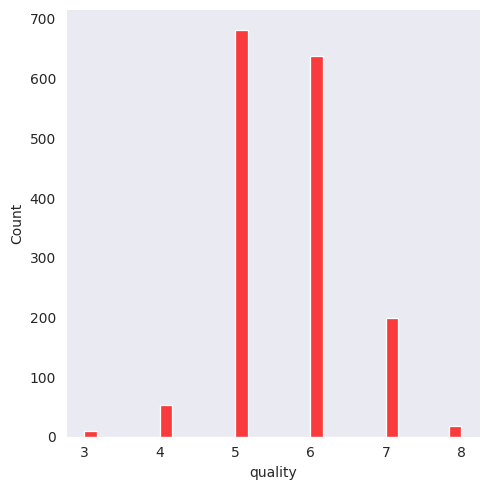

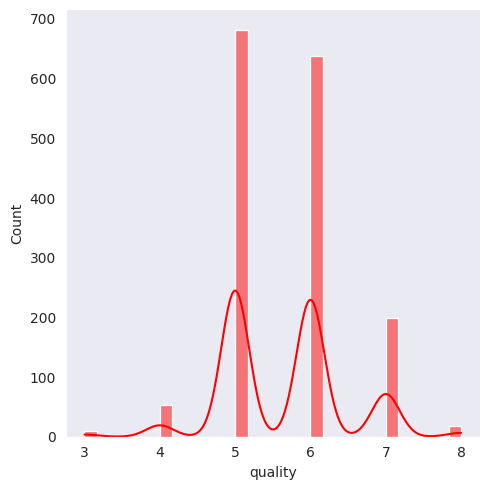

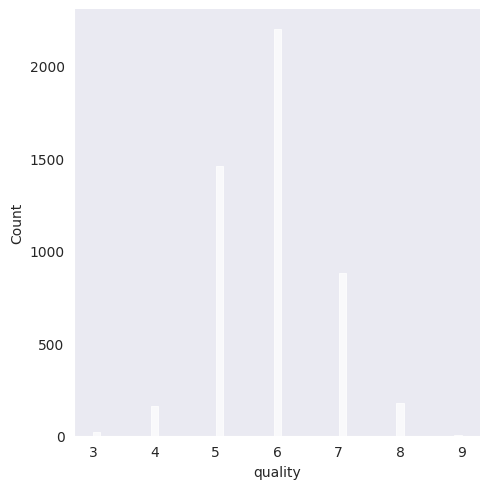

In [ ]:
sns.set_style("dark")
# displot 분포플롯
sns.displot(red_q, color = "red", label = "red wine", kde=False)
sns.displot(red_q, color = "red", label = "red wine", kde=True)
sns.displot(white_q, color = "white", label = "white wine")

## 챗GPT 설명

    distplot은 Seaborn의 이전 버전에서 사용되던 함수


> 주의: distplot은 Seaborn 0.11.0부터 더 이상 사용되지 않으며, 향후 버전에서 제거될 예정입니다.<BR>최신 버전에서는 sns.histplot이나 sns.kdeplot을 사용하는 것을 권장합니다.


In [ ]:
# 두 개의 데이터 프레임을 distplot으로 합쳐서 그립니다.
sns.distplot(red_q, color="red", label="red wine", kde=False, hist=True, alpha=0.5)  # 적포도주
sns.distplot(white_q, color="white", label="white wine", kde=False, hist=True, alpha=0.5)  # 백포도주

# 그래프의 제목과 축 레이블 설정
plt.title("Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Density")

# 범례 추가
plt.legend()

# 그래프 표시
plt.show()

# 위 코드는 오류 발생

TypeError: distplot() got an unexpected keyword argument 'alpha'

`histplot` 으로 다시 진행

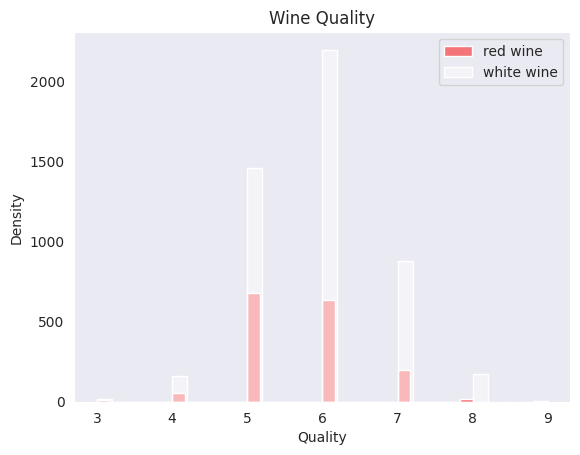

In [ ]:
# 두 개의 데이터 프레임을 histplot으로 합쳐서 그립니다.
sns.histplot(red_q, color="red", label="red wine", kde=False, bins=30, alpha=0.5)  # 적포도주
sns.histplot(white_q, color="white", label="white wine", kde=False, bins=30, alpha=0.5)  # 백포도주

# 그래프의 제목과 축 레이블 설정
plt.title("Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Density")

# 범례
plt.legend()

# 그래프
plt.show()

## 와인 종류별 품질 차이의 통계적 유의성 검정
- 귀무가설 정의 → 표본 추출 → 통계 기법을 통한 검정 → 귀무가설 기각 or  채택

- 2개의 모집단(레드와인, 화이트와인) → t-test 진행(t검정)
- 귀무가설 : `와인 종류별 품질의 차이는 없다` / 평균 차이가 없다
- p-value < 0.05 : 평균차이가 있음
- p-valeu > 0.05 : 평균차이가 없음(귀무가설 채택)

In [ ]:
# quality에 대한 평균, 표준편차
wine.groupby("type")["quality"].agg(["mean", "std"])

,mean,std
type,,
red,5.636023,0.807569
white,5.877909,0.885639


## 챗GPT statsmodels 라이브러리 설명

`statsmodels`는 데이터 분석가와 연구자에게 매우 강력한 도구로, <BR>통계적 모델링과 분석을 위한 다양한 기능을 제공합니다. <BR>이를 통해 사용자들은 데이터에서 통찰력을 얻고, 예측 모델을 구축하며, 연구 결과를 검증할 수 있습니다.


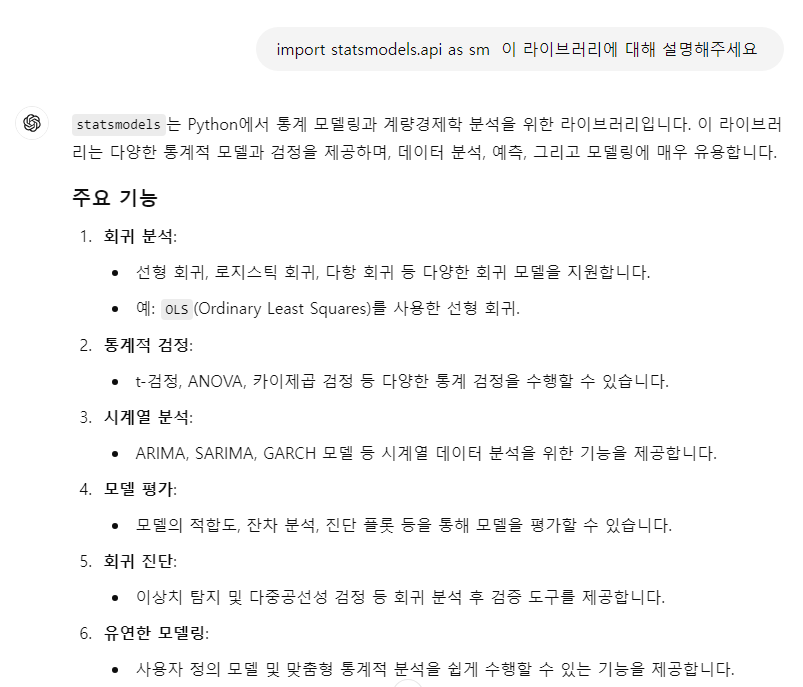

## 와인 종류별 t-검정

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# red_q, white_q 두 개의 데이터 비교
sm.stats.ttest_ind(red_q, white_q) # ttest_ind 함수
# t통계량, p value

(-9.68564955418768, 4.888069044202279e-22, 6495.0)

In [ ]:
# p vlaue 값
sm.stats.ttest_ind(red_q, white_q)[1]
sm.stats.ttest_ind(red_q, white_q)[1] <= 0.05
# 귀무가설 기각 : 레드화인과 화이트 와인의 품질에 차이가 있다.

True

In [ ]:
# t통계량 : t_stat
# p value : p_value,
# 밀도 함수의 함수 기울기(degree of freedom) : df

t_stat, p_value, df = sm.stats.ttest_ind(red_q, white_q)
print(t_stat, p_value, df)
# 't-test : {:3f}, p-value : {:4f}'.format(t_stat, p_value)
f't-test:{t_stat:3f}, p-value:{p_value:4f}'

-9.68564955418768 4.888069044202279e-22 6495.0


't-test:-9.685650, p-value:0.000000'

In [ ]:
# p-value = 0.000 < 0.05
# 평균의 차이가 있음


# 와인 품질 예측 모델 만들기

## 와인 품질 데이터 상관 분석

- [참고 유튜브 : K-ICT 빅데이터 센터_ 파이썬 머신러닝 강의 07-3 와인 품질 데이터 상관 분석](https://youtu.be/OhXREH7orHs?feature=shared)

In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [ ]:
# type 문자열 변경
# map() 메서드로 딕셔너리({'red': 0, 'white': 1})를 사용하여 type 열의 값을 변환
wine['type'].map({'red': 0, 'white': 1})
wine_rename = wine['type'].map({'red': 0, 'white': 1})
wine_1 = pd.concat([wine, wine_rename.rename('type_num')], axis=1)
wine_1.info()
wine_1 = wine_1.drop('type', axis=1)
wine_1.info() # type 삭제

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
 13  type_num              6497 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 761.4+ KB
<class 'pandas.co

In [ ]:
# 문자열 type 삭제
wine.info()
wine_2 = wine.drop('type', axis=1)
wine_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897

In [ ]:
# 변수들 사이의 상관계수 계산
wine_corr = wine_2.corr()
wine_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


<Axes: >

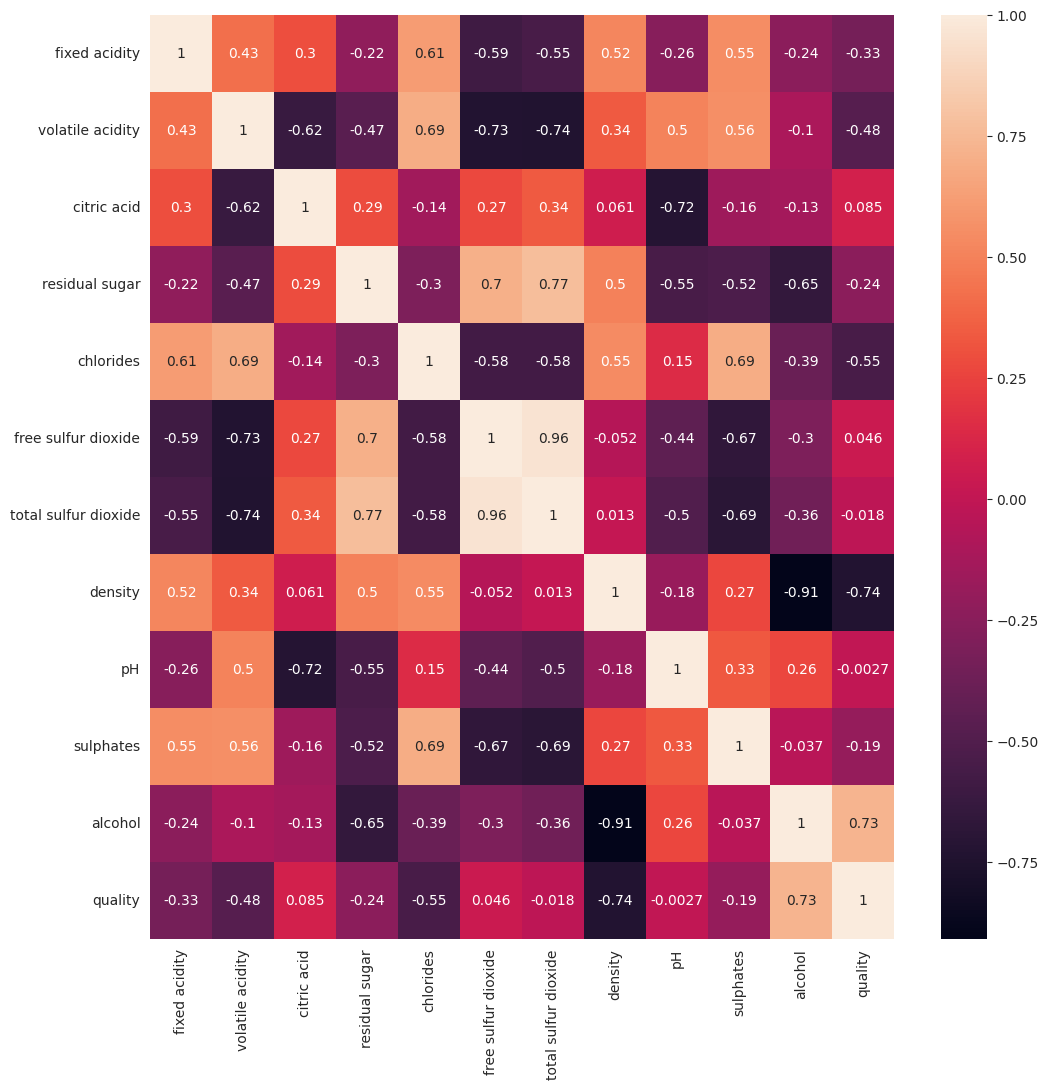

In [ ]:
# 보기쉽게~~
plt.figure(figsize=(12,12))
sns.heatmap(data = wine_corr.corr(), annot=True)

In [ ]:
# -1 < 상관계수 < 1
# 독립(상관이 없다) R = 0 / 0에 가까우면 관련성 없다

#     0에 가까우면 관련성이 없다. = 독립적이다.
# -1, 1에 가까우면 관련성이 있다.

# R 값이 +1에 가까우면 양의 상관관계가 높음. x가 커지면 y도 커지는
# R 값이 -1에 가까우면 음의 상관관계가 높음.

In [ ]:
# 양의 상관관계
wine_corr.loc[wine_corr['quality'] > 0, "quality"] # quality가 0보다 큰, 값을 찾아달라.
# 구연산, 무수아황산, 산성도, 황산염, 알콜도
# 양의 상관관계에서 가장 큰 것 > 알콜 도수 alcohol

,quality
citric acid,0.085532
free sulfur dioxide,0.055463
pH,0.019506
sulphates,0.038485
alcohol,0.444319
quality,1.000000


In [ ]:
# 음의 상관관계
wine_corr.loc[wine_corr['quality'] < 0, "quality"] # quality가 0보다 적은, 값을 찾아달라.
# 고정산, 휘발산, 잔여당, 염화물, 총이산화황, 밀도
# 음의 상관관계에서는 밀도!

,quality
fixed acidity,-0.076743
volatile acidity,-0.265699
residual sugar,-0.036980
chlorides,-0.200666
total sulfur dioxide,-0.041385
density,-0.305858


# 와인 품질 데이터 탐색적 분석 실습

- [참고 유튜브 : K-ICT 빅데이터 센터_ 파이썬 머신러닝 강의 07-4 와인 품질 데이터 탐색적 분석 실습](https://youtu.be/g3ErwN8AKkw?feature=shared)

## 산점도 행렬을 위한 데이터 준비

In [ ]:
# red
wine.loc[wine["type"] == "red"]
red_Sample = wine.loc[wine["type"] == "red"]

# white
wine.loc[wine["type"] == "white"]
white_Sample = wine.loc[wine["type"] == "white"]

In [ ]:
red_Sample.head()
# 레드 index 0 ~ n까지의 인덱스 중 랜덤으로 200개
np.random.choice(red_Sample.index, replace=True, size = 200)
red_idx = np.random.choice(red_Sample.index, replace=True, size = 200)
red_idx

array([ 804,  755,  240,  641, 1419, 1479,  629, 1301,  912,  295,  512,
        232,   90, 1331,   18,  901, 1023,  501,  508,  595, 1313, 1592,
        914,  910, 1396,  145,  915, 1290,  761,  710,  352,  376, 1269,
        604, 1528, 1165,  909,  916, 1243, 1305, 1371,  529, 1183, 1153,
       1395, 1106,  382,  955,  261,  924, 1132,  587,  791,    3,   96,
        230, 1146,  125,  681,  822,  781, 1510, 1012,  764,   20,   20,
        866, 1583,  267, 1526,  127, 1487, 1023, 1233,  535,  787,  841,
       1224, 1085, 1031,  955, 1103,  682,  983,  850,  888, 1459,  104,
        145, 1131,  947,  448,  562,  592,   90,  483,  376,  380,   73,
       1324,  555,  529, 1299, 1267,  574, 1062, 1447, 1516, 1172, 1129,
        230, 1114,  435, 1517,  688, 1513, 1099,  891,  718, 1554,  289,
       1301, 1169, 1139,  139,  356,  697, 1477, 1412,   14,  261, 1310,
        354, 1505, 1581, 1420, 1415, 1327,   40,  135,  821,   43,  552,
        496,  444,   98,  399,  407,  786,  646, 13

In [ ]:
# 화이 index 0 ~ n까지의 인덱스 중 랜덤으로 200개
np.random.choice(white_Sample.index, replace=True, size = 200)
white_idx = np.random.choice(white_Sample.index, replace=True, size = 200)
white_idx

array([1818,   11, 2260, 2980, 4610, 1886,  526, 3855,  457,  796, 2579,
         66, 2745, 4313,   77, 4482, 2266, 1522, 2987, 2813, 2683, 1062,
        447, 4803, 4663, 1525, 1613, 2225, 4844, 4783, 4429, 3736, 1332,
       3285, 2914, 2226,  578, 3925, 4457, 1164, 4881, 2269, 1186, 1195,
       2947, 3991, 2227, 1980, 2849, 4409, 4755, 4546, 4283, 4795,  441,
        635, 3680, 1851, 3986, 2891, 4004,  192, 1462, 2579, 2207,  962,
       2704, 3723, 2556,  737, 3694,  622, 2769, 4149, 2950, 1066, 2897,
       2566,  734, 1222, 4522,  782, 2757,   24,  109, 2422,  693,  372,
       2576, 1584, 1287, 3131, 3055, 4042, 1671,  419, 4282, 1622, 4111,
        824, 3703, 4705,  328, 2076, 4606, 2929, 1751, 1313, 1848, 2836,
       4528, 4224, 4039, 2767, 4869, 2839, 1193, 1922, 4165, 3137, 2932,
        823, 3701, 3515,  942,  664, 3681, 4347, 3107, 4507, 4437, 4803,
       2458, 4379, 2061, 1767, 1621, 4260, 3603, 4078, 2778, 4292, 3954,
       2609, 4030, 4538, 1612, 3167, 1132, 3901,  8

In [ ]:
red_Sample

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


In [ ]:
red_idx

array([ 804,  755,  240,  641, 1419, 1479,  629, 1301,  912,  295,  512,
        232,   90, 1331,   18,  901, 1023,  501,  508,  595, 1313, 1592,
        914,  910, 1396,  145,  915, 1290,  761,  710,  352,  376, 1269,
        604, 1528, 1165,  909,  916, 1243, 1305, 1371,  529, 1183, 1153,
       1395, 1106,  382,  955,  261,  924, 1132,  587,  791,    3,   96,
        230, 1146,  125,  681,  822,  781, 1510, 1012,  764,   20,   20,
        866, 1583,  267, 1526,  127, 1487, 1023, 1233,  535,  787,  841,
       1224, 1085, 1031,  955, 1103,  682,  983,  850,  888, 1459,  104,
        145, 1131,  947,  448,  562,  592,   90,  483,  376,  380,   73,
       1324,  555,  529, 1299, 1267,  574, 1062, 1447, 1516, 1172, 1129,
        230, 1114,  435, 1517,  688, 1513, 1099,  891,  718, 1554,  289,
       1301, 1169, 1139,  139,  356,  697, 1477, 1412,   14,  261, 1310,
        354, 1505, 1581, 1420, 1415, 1327,   40,  135,  821,   43,  552,
        496,  444,   98,  399,  407,  786,  646, 13

In [ ]:
# red_Sample에서 red_idx에 해당하는 데이터 선택
# white마찬가지 > 두 개를 합체~
pd.concat([red_Sample.loc[red_idx], white_Sample.loc[white_idx]])
wine_sam = pd.concat([red_Sample.loc[red_idx], white_Sample.loc[white_idx]])
wine_sam.head()
wine_sam.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 804 to 852
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         400 non-null    float64
 1   volatile acidity      400 non-null    float64
 2   citric acid           400 non-null    float64
 3   residual sugar        400 non-null    float64
 4   chlorides             400 non-null    float64
 5   free sulfur dioxide   400 non-null    float64
 6   total sulfur dioxide  400 non-null    float64
 7   density               400 non-null    float64
 8   pH                    400 non-null    float64
 9   sulphates             400 non-null    float64
 10  alcohol               400 non-null    float64
 11  quality               400 non-null    int64  
 12  type                  400 non-null    object 
dtypes: float64(11), int64(1), object(1)
memory usage: 43.8+ KB


- pairplot 활용해서 스캐터플롯, 히스토그램 그리기

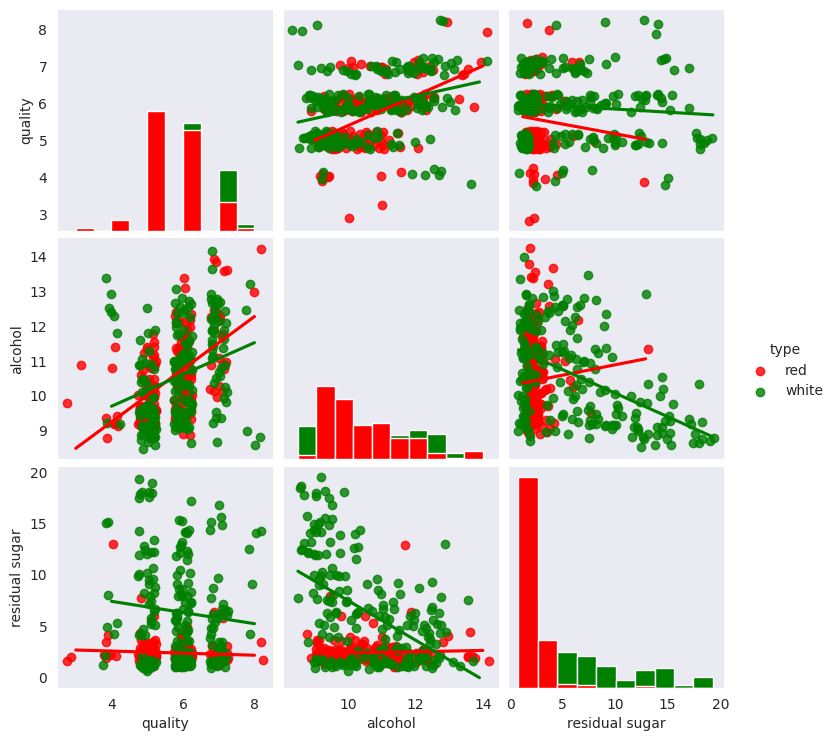

In [ ]:
sns.set_style("dark")

sns.pairplot(wine_sam,
             vars=[ 'quality','alcohol','residual sugar'], # 특정 데이터만 가져오깅
             kind='reg', # 회귀선
             plot_kws={'ci':False, 'x_jitter':0.25, 'y_jitter':0.25}, # 회귀선
             diag_kind='hist', # 히스토그램
             diag_kws={'bins':10, 'alpha':1}, # 히스토그램
             hue='type', # 색깔
             palette=dict(red='red', white='green', markers=['^', 's']) # 색깔 및 모양
             );



---

